# Forests of randomized trees
Some References:
- https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Data Preprocessing
- Removing outliers of price
- Apply categorial label

In [3]:
london = pd.read_csv('london_weekdays.csv')
london = london.drop(columns=['Unnamed: 0'])

In [4]:
#To remove outliers from realSum 
# Calculate the quartiles
Q1 = london['realSum'].quantile(0.25)
Q3 = london['realSum'].quantile(0.75)

# Remove outliers of realSum
london = london.loc[((london['realSum'] > (Q1 - 1.5 * (Q3 - Q1))) & (london['realSum'] < (Q3 + 1.5 * (Q3 - Q1))))]
london.shape

(4367, 19)

In [5]:
#Apply categorical label to columns 
london[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']].apply(lambda x: x.astype('category'))

#Convert Roomtype to oridinal 
london["room_type"] = london["room_type"].replace({'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2})
london.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,2,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,1,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,1,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,1,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,1,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


### Split Data

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [7]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(london["realSum"])
x = pd.DataFrame(london[["person_capacity", "bedrooms", "dist", "metro_dist", "attr_index_norm", "rest_index_norm", "room_type", "biz"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3493, 8)
(874, 8)
(3493, 1)
(874, 1)


In [8]:
x_train.head()

,person_capacity,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type,biz
2917,2.0,1,6.471332,2.144516,12.722922,7.143038,1,0
3799,2.0,1,2.560201,0.638152,28.009212,13.057521,2,0
3453,3.0,2,3.858073,0.534662,21.390655,11.597532,2,0
4505,2.0,1,4.403261,0.500360,23.689984,12.374307,1,1
2769,2.0,1,4.959268,0.911725,15.646870,9.037823,1,0


### Train and Test

In [9]:
# create regressor object
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
model.fit(x, y)

#Prediction using test data set 
y_test_pred = model.predict(x_test)

C:\Users\long\AppData\Local\Temp\ipykernel_8468\76617234.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9537011622810787
Mean Squared Error (MSE) 	: 1316.188057155781



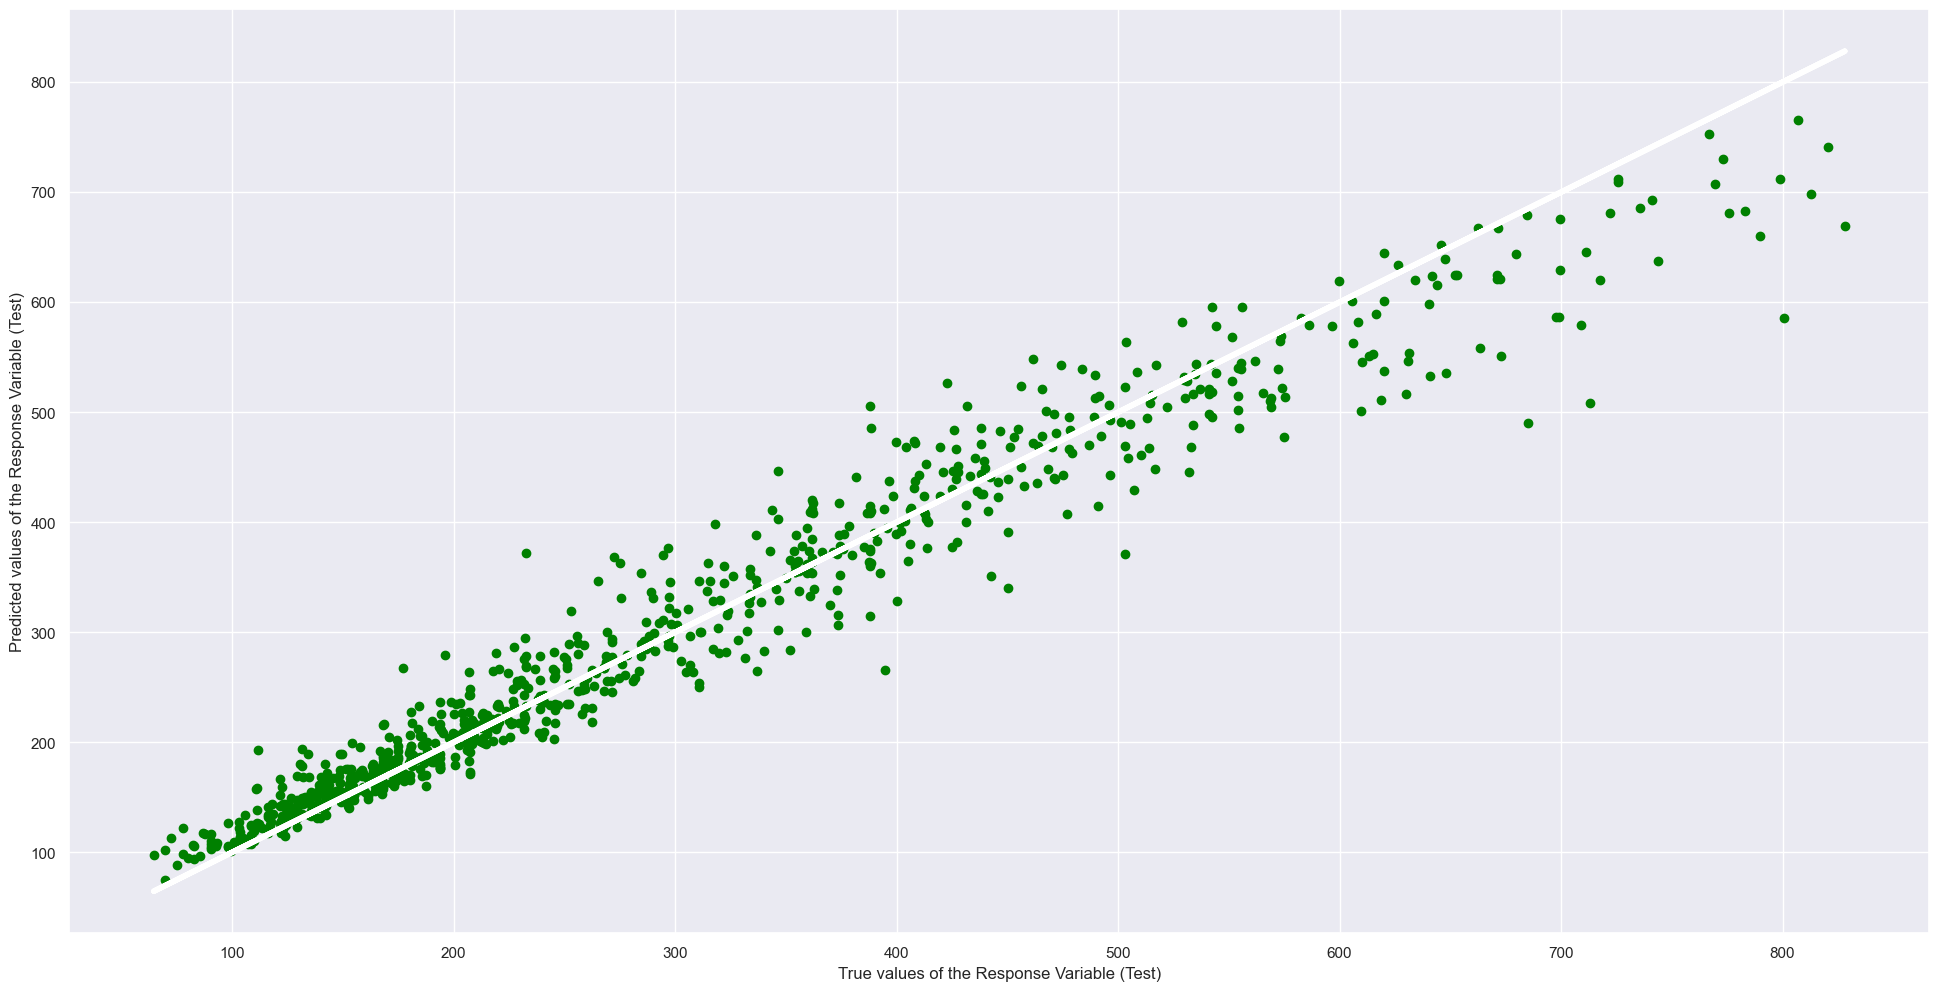

In [10]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_test, y_test_pred, color = "green")
axes.plot(y_test, y_test, 'w-', linewidth = 4)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [30]:
df = pd.DataFrame(london, index=x_test.index)
y_pred_df = pd.DataFrame(y_test_pred, index=x_test.index)
y_pred_df.columns = ['predSum']
df = pd.concat([df, y_pred_df], axis=1)
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,predSum
4567,134.528093,1,False,True,2.0,False,0,0,10.0,100.0,1,7.233455,0.426502,171.849214,11.945430,360.171996,6.449180,-0.02919,51.52985,147.251817
2996,149.344999,1,False,True,2.0,False,1,0,7.0,75.0,1,7.306803,2.171189,151.620736,10.539326,317.266688,5.680925,-0.11544,51.44309,153.025706
816,93.134834,1,False,True,2.0,False,0,0,10.0,100.0,1,14.040543,5.826877,87.255930,6.065257,177.578626,3.179693,0.06055,51.46211,108.205743
2942,565.629483,2,False,False,3.0,False,0,0,8.0,85.0,0,4.817482,0.239872,284.048016,19.744493,725.799625,12.996048,-0.19230,51.49285,517.869658
4159,219.666502,1,False,True,2.0,False,0,1,8.0,80.0,1,2.664989,0.254700,449.330857,31.233487,932.201976,16.691854,-0.16020,51.52088,232.815918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,142.289329,1,False,True,2.0,False,0,0,10.0,100.0,1,7.630586,0.093824,158.479968,11.016118,385.578311,6.904101,-0.23528,51.49494,158.853689
3400,131.705826,1,False,True,2.0,False,0,0,9.0,93.0,0,6.666436,0.921020,170.435903,11.847189,371.361287,6.649534,-0.08993,51.56347,148.973400
273,496.248736,2,False,False,5.0,False,0,1,9.0,90.0,1,5.029311,1.528433,232.297506,16.147257,506.816033,9.074964,-0.17514,51.47428,492.481008
1144,173.099085,1,False,True,2.0,False,0,0,10.0,97.0,1,9.067019,4.066127,142.445295,9.901531,280.596671,5.024318,-0.01588,51.46610,160.128413


In [31]:
underpriced = df.query('realSum < predSum')
overpriced = df.query('realSum > predSum')

In [32]:
underpriced['guest_satisfaction_overall'].mean()

89.44313725490196

count    510.000000
mean      89.443137
std       10.605430
min       20.000000
25%       84.000000
50%       92.000000
75%       98.000000
max      100.000000
Name: guest_satisfaction_overall, dtype: float64

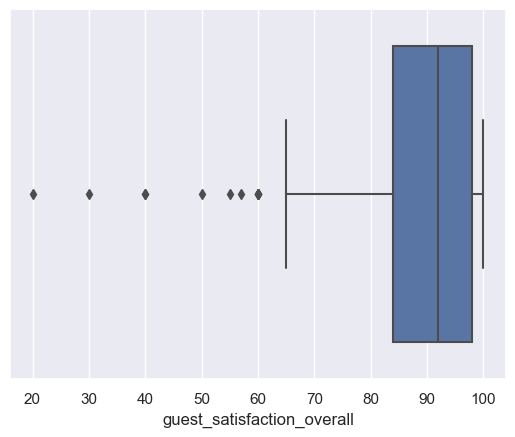

In [33]:
sb.boxplot(data = underpriced, x='guest_satisfaction_overall')
underpriced['guest_satisfaction_overall'].describe()

In [34]:
overpriced['guest_satisfaction_overall'].mean()

90.7032967032967

count    364.000000
mean      90.703297
std       12.738086
min       20.000000
25%       87.000000
50%       95.000000
75%      100.000000
max      100.000000
Name: guest_satisfaction_overall, dtype: float64

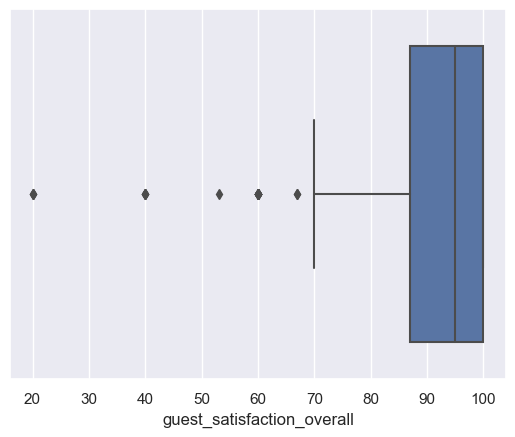

In [35]:
sb.boxplot(data = overpriced, x='guest_satisfaction_overall')
overpriced['guest_satisfaction_overall'].describe()

### Check the same for test_set

In [36]:
dft = pd.DataFrame(london, index=x_train.index)
y_train_pred = model.predict(x_train)
y_pred_df_train = pd.DataFrame(y_train_pred, index=x_train.index)
y_pred_df_train.columns = ['predSum']
dft = pd.concat([dft, y_pred_df_train], axis=1)
dft

underpriced = dft.query('realSum < predSum')
overpriced = dft.query('realSum > predSum')
underpriced.shape

(2022, 20)

count    2022.000000
mean       89.477250
std        11.718293
min        20.000000
25%        84.000000
50%        93.000000
75%        98.000000
max       100.000000
Name: guest_satisfaction_overall, dtype: float64

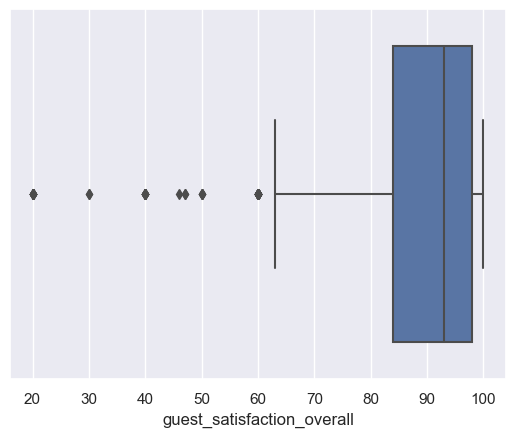

In [37]:
sb.boxplot(data = underpriced, x='guest_satisfaction_overall')
underpriced['guest_satisfaction_overall'].describe()

count    1471.000000
mean       91.422162
std        11.739486
min        20.000000
25%        88.000000
50%        95.000000
75%       100.000000
max       100.000000
Name: guest_satisfaction_overall, dtype: float64

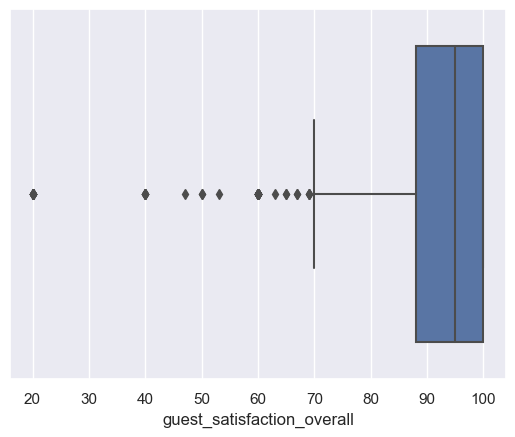

In [38]:
sb.boxplot(data = overpriced, x='guest_satisfaction_overall')
overpriced['guest_satisfaction_overall'].describe()